In [2]:
import pandas as pd

## Carregando Base de Dados

In [4]:
enem = pd.read_csv('src/enem_2019.csv', index_col=[0])

In [5]:
enem.head()

,NU_INSCRICAO,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,...,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q005,Q006
0,190003903183,2019,19,3,1,1,F,Canindé de São Francisco,SE,2,...,0,0,0,0,B,B,A,A,5,B
1,190005124618,2019,19,2,1,1,F,São Bernardo do Campo,SP,2,...,0,0,0,0,A,A,B,B,4,B
2,190001447215,2019,39,3,2,1,F,Ibititá,BA,1,...,0,0,0,0,B,C,A,A,3,C
3,190003825026,2019,17,3,1,1,M,Tangará da Serra,MT,2,...,0,0,0,0,E,E,D,B,4,F
4,190001995539,2019,17,1,1,1,F,Parnarama,MA,2,...,0,0,0,0,B,E,D,D,5,B


In [6]:
enem.set_index('NU_INSCRICAO', drop=True, inplace=True)

In [7]:
enem.shape

(10000, 33)

## Verificando Valores NAN

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

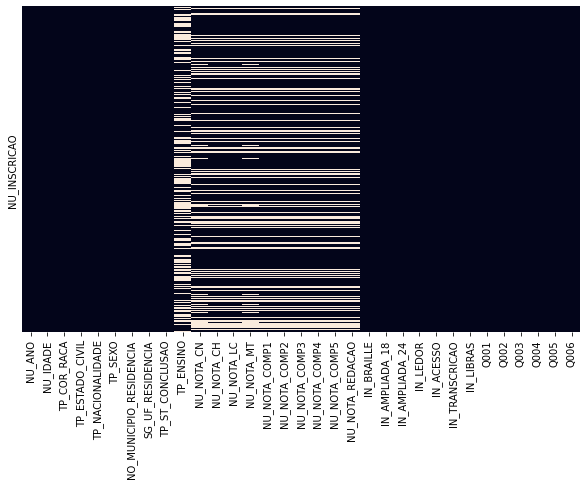

In [8]:
plt.figure(figsize = (10,6))
sns.heatmap(enem.isnull(), yticklabels=False, cbar=False)

plt.savefig('img/nan_data.png',  bbox_inches='tight')

In [23]:
var_with_nan = []
def verfify_nan_values(df):
    df_nan = pd.DataFrame()
    var_without_nan = []
    var_column = []
    var_percent = []
    total = df.shape[0]
    count = 0
    for index, value in df.isna().sum().iteritems():
        if value == 0:
            var_without_nan.append(index)
        else:
            percent_with_nan = (value / total) * 100
            var_with_nan.append(count)
            var_column.append(index)
            var_percent.append(percent_with_nan)
        count  = count + 1
    df_nan.insert(0, 'coluna', var_column, True)
    df_nan.insert(1, 'porcentagem_nan %', var_percent, True)

    return df_nan

In [25]:
df = verfify_nan_values(enem)

writer = pd.ExcelWriter('tabelas/porcentagem_nan.xlsx', engine = 'xlsxwriter')
df.to_excel(writer)
writer.save()
writer.close()

In [26]:
enem_without_nan = enem.copy()

In [27]:
enem_without_nan.fillna(enem_without_nan.mean(), inplace=True)

C:\Users\DESKTOP\AppData\Local\Temp/ipykernel_2536/3688268784.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  enem_without_nan.fillna(enem_without_nan.mean(), inplace=True)


In [28]:
verfify_nan_values(enem_without_nan)

,coluna,porcentagem_nan %


Vamos substituir os valores NAN pela média ou mediana

<AxesSubplot:ylabel='NU_INSCRICAO'>

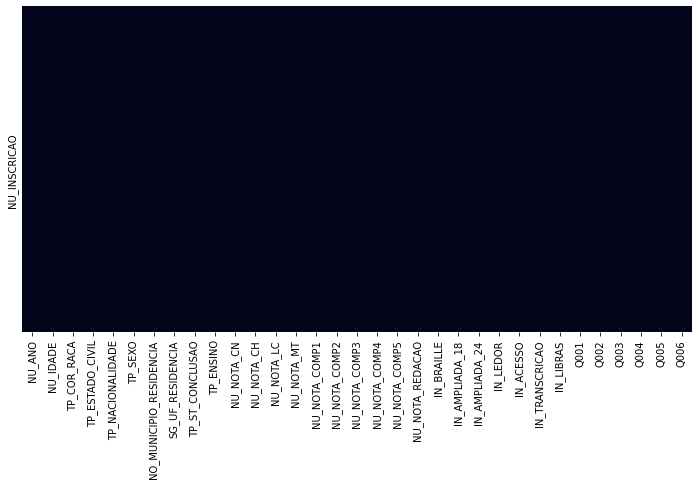

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(enem_without_nan.isnull(), yticklabels=False, cbar=False)

In [30]:
enem_without_nan.shape

(10000, 33)

In [31]:
enem_without_nan.head()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,...,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q005,Q006
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,19,3,1,1,F,Canindé de São Francisco,SE,2,1.000000,...,0,0,0,0,B,B,A,A,5,B
190005124618,2019,19,2,1,1,F,São Bernardo do Campo,SP,2,1.004799,...,0,0,0,0,A,A,B,B,4,B
190001447215,2019,39,3,2,1,F,Ibititá,BA,1,1.000000,...,0,0,0,0,B,C,A,A,3,C
190003825026,2019,17,3,1,1,M,Tangará da Serra,MT,2,1.000000,...,0,0,0,0,E,E,D,B,4,F
190001995539,2019,17,1,1,1,F,Parnarama,MA,2,1.000000,...,0,0,0,0,B,E,D,D,5,B


In [32]:
enem.describe()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q005
count,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,5626.000000,7309.000000,7681.000000,7681.000000,...,7681.000000,7681.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000
mean,2019.0,21.916100,2.131600,1.07440,1.029400,1.543600,1.004799,478.650951,508.523747,522.027327,...,93.368051,577.570629,0.0,0.000600,0.0,0.000500,0.001400,0.000600,0.0001,3.85260
std,0.0,7.180684,1.018816,0.44191,0.206252,0.716903,0.069116,76.404125,83.147337,63.652230,...,59.699953,187.971860,0.0,0.024489,0.0,0.022356,0.037392,0.024489,0.0100,1.48926
min,2019.0,14.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,1.00000
25%,2019.0,18.000000,1.000000,1.00000,1.000000,1.000000,1.000000,418.300000,449.900000,484.800000,...,40.000000,480.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,3.00000
50%,2019.0,19.000000,2.000000,1.00000,1.000000,1.000000,1.000000,471.000000,512.200000,527.300000,...,100.000000,580.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,4.00000
75%,2019.0,23.000000,3.000000,1.00000,1.000000,2.000000,1.000000,536.400000,568.200000,566.400000,...,140.000000,680.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,5.00000
max,2019.0,71.000000,5.000000,4.00000,4.000000,4.000000,2.000000,791.900000,753.300000,733.100000,...,200.000000,980.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0000,20.00000


In [33]:
enem_without_nan.describe()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q005
count,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000
mean,2019.0,21.916100,2.131600,1.07440,1.029400,1.543600,1.004799,478.650951,508.523747,522.027327,...,93.368051,577.570629,0.0,0.000600,0.0,0.000500,0.001400,0.000600,0.0001,3.85260
std,0.0,7.180684,1.018816,0.44191,0.206252,0.716903,0.051839,65.318739,72.870319,55.784809,...,52.321034,164.738522,0.0,0.024489,0.0,0.022356,0.037392,0.024489,0.0100,1.48926
min,2019.0,14.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,1.00000
25%,2019.0,18.000000,1.000000,1.00000,1.000000,1.000000,1.000000,438.000000,469.600000,500.000000,...,80.000000,520.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,3.00000
50%,2019.0,19.000000,2.000000,1.00000,1.000000,1.000000,1.000000,478.650951,508.523747,522.027327,...,93.368051,577.570629,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,4.00000
75%,2019.0,23.000000,3.000000,1.00000,1.000000,2.000000,1.004799,510.700000,550.600000,553.500000,...,120.000000,640.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,5.00000
max,2019.0,71.000000,5.000000,4.00000,4.000000,4.000000,2.000000,791.900000,753.300000,733.100000,...,200.000000,980.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0000,20.00000


## Tipos de Variáveis

### Variáveis Qualitativas

In [20]:
enem_types = enem_without_nan[[
'NU_ANO',
'TP_SEXO',
'TP_COR_RACA',
'TP_ESTADO_CIVIL',
'TP_NACIONALIDADE',
'NO_MUNICIPIO_RESIDENCIA',
'SG_UF_RESIDENCIA',
'TP_ST_CONCLUSAO',
'TP_ENSINO',
'IN_BRAILLE',
'IN_AMPLIADA_18',
'IN_AMPLIADA_24',
'IN_LEDOR',
'IN_ACESSO',
'IN_TRANSCRICAO',
'IN_LIBRAS',
'Q001',
'Q002',
'Q003',
'Q004',
'Q006']]

enem_types.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q006
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,Canindé de São Francisco,SE,2,1.000000,0,...,0,0,0,0,0,B,B,A,A,B
190005124618,2019,F,2,1,1,São Bernardo do Campo,SP,2,1.004799,0,...,0,0,0,0,0,A,A,B,B,B
190001447215,2019,F,3,2,1,Ibititá,BA,1,1.000000,0,...,0,0,0,0,0,B,C,A,A,C
190003825026,2019,M,3,1,1,Tangará da Serra,MT,2,1.000000,0,...,0,0,0,0,0,E,E,D,B,F
190001995539,2019,F,1,1,1,Parnarama,MA,2,1.000000,0,...,0,0,0,0,0,B,E,D,D,B



NU_ANO
TP_SEXO
TP_ESTADO_CIVIL
TP_COR_RACA
TP_NACIONALIDADE
NO_MUNICIPIO_RESIDENCIA
SG_UF_RESIDENCIA
TP_ST_CONCLUSAO
TP_ENSINO
Q001
Q002
Q003
Q004
Q006


VARIÁVEL QUALITATIVA ORDINAL
VARIÁVEL QUALITATIVA NOMINAL DICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA
VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [35]:
var_column = [
    'NU_ANO',
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'NO_MUNICIPIO_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'TP_ST_CONCLUSAO',
    'TP_ENSINO',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q006',
    'NU_IDADE',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q005'
]


var_type = [ 
    'VARIÁVEL QUALITATIVA ORDINAL',
'VARIÁVEL QUALITATIVA NOMINAL DICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA',
'VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA',
'VARIÁVEL QUANTITATIVA DISCRETA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA CONTÍNUA',
'VARIÁVEL QUANTITATIVA DISCRETA'
]


In [36]:
df_type = pd.DataFrame()
df_type.insert(0, 'coluna', var_column, True)
df_type.insert(1, 'descrição do tipo', var_type, True)


writer = pd.ExcelWriter('tabelas/tipo_colunas.xlsx', engine = 'xlsxwriter')
df_type.to_excel(writer)
writer.save()
writer.close()

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


#### 2. NU_ANO -> VARIÁVEL QUALITATIVA ORDINAL

In [21]:
enem_types.NU_ANO = enem_types.NU_ANO.astype('category')

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### 3. TP_SEXO -> VARIÁVEL QUALITATIVA NOMINAL DICOTÔMICA

In [22]:
enem_types.TP_SEXO = enem_types.TP_SEXO.astype('category')

#### 4. TP_ESTADO_CIVIL -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [23]:
enem_types.TP_ESTADO_CIVIL = enem_types.TP_ESTADO_CIVIL.astype('category')

#### 5. TP_COR_RACA -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [24]:
enem_types.TP_COR_RACA = enem_types.TP_COR_RACA.astype('category')

#### 6. TP_NACIONALIDADE -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [25]:
enem_types.TP_NACIONALIDADE = enem_types.TP_NACIONALIDADE.astype('category')

#### 7. NO_MUNICIPIO_RESIDENCIA -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [26]:
enem_types.NO_MUNICIPIO_RESIDENCIA = enem_types.NO_MUNICIPIO_RESIDENCIA.astype('category')

#### 8. SG_UF_RESIDENCIA -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [27]:
enem_types.SG_UF_RESIDENCIA = enem_types.SG_UF_RESIDENCIA.astype('category')

#### 9. TP_ST_CONCLUSAO -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [28]:
enem_types.TP_ST_CONCLUSAO = enem_types.TP_ST_CONCLUSAO.astype('category')

#### 10. TP_ENSINO -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [29]:
enem_types.TP_ENSINO = enem_types.TP_ENSINO.astype('category')

#### 11. Q001 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [30]:
enem_types.Q001 = enem_types.Q001.astype('category')

#### 12. Q002 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [31]:
enem_types.Q002 = enem_types.Q002.astype('category')

#### 13. Q003 -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [32]:
enem_types.Q003 = enem_types.Q003.astype('category')

#### 14. Q004 -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [33]:
enem_types.Q004 = enem_types.Q004.astype('category')

#### 15. Q006 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [34]:
enem_types.Q006 = enem_types.Q006.astype('category')

Renda Mensal

### Variáveis Quantitativas

In [37]:
enem_quant = enem_without_nan[['NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5',
'NU_NOTA_REDACAO',
'Q005']]

enem_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,,,,,,
190003903183,19,437.900000,423.700000,457.200000,461.900000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5
190005124618,19,426.200000,548.700000,537.900000,427.700000,120.000000,120.000000,120.00000,120.000000,120.000000,600.000000,4
190001447215,39,478.650951,508.523747,522.027327,524.382679,121.023304,124.093217,116.13592,122.950137,93.368051,577.570629,3
190003825026,17,359.300000,520.100000,430.100000,493.300000,100.000000,120.000000,100.00000,100.000000,20.000000,440.000000,4
190001995539,17,494.700000,503.700000,545.200000,585.600000,160.000000,180.000000,180.00000,180.000000,180.000000,880.000000,5


NU_IDADE
NU_NOTA_CN
NU_NOTA_CH
NU_NOTA_LC
NU_NOTA_MT
NU_NOTA_COMP1
NU_NOTA_COMP2
NU_NOTA_COMP3
NU_NOTA_COMP4
NU_NOTA_COMP5
NU_NOTA_REDACAO

#### 16. NU_IDADE -> VARIÁVEL QUANTITATIVA DISCRETA

#### 17. NU_NOTA_CN -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 18. NU_NOTA_CH -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 19. NU_NOTA_LC -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 20. NU_NOTA_MT -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 21. NU_NOTA_REDACAO -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 22. Q005 -> VARIÁVEL QUANTITATIVA DISCRETA

Quantidade de Pessoas na Residência

## Tratando Outliers

In [36]:
enem_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,,,,,,
190003903183,19,437.900000,423.700000,457.200000,461.900000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5
190005124618,19,426.200000,548.700000,537.900000,427.700000,120.000000,120.000000,120.00000,120.000000,120.000000,600.000000,4
190001447215,39,478.650951,508.523747,522.027327,524.382679,121.023304,124.093217,116.13592,122.950137,93.368051,577.570629,3
190003825026,17,359.300000,520.100000,430.100000,493.300000,100.000000,120.000000,100.00000,100.000000,20.000000,440.000000,4
190001995539,17,494.700000,503.700000,545.200000,585.600000,160.000000,180.000000,180.00000,180.000000,180.000000,880.000000,5


In [37]:
import numpy as np

In [38]:
def analise_outliers(df):
    fig, axes = plt.subplots(4,5, figsize=(25,40))

    n_column = 0
    for i in range(0,4):
        for j in range(0,5):
            if i == 3 and j == 2:
                break
            else:
                axes[i,j].boxplot(x = df.iloc[:, n_column], data = df)
                axes[i, j].set_title(df.columns[n_column])
                n_column += 1

In [39]:
def plot_box_plot(df):
    plt.figure(figsize = (25,40))
    Features = df.columns
    for i in range(len(Features)):
        plt.subplot(6,3, i + 1)
        sns.boxplot(y = df[Features[i]], data = df)
        plt.title(f"Boxplot of {Features[i]}")
        plt.tight_layout()

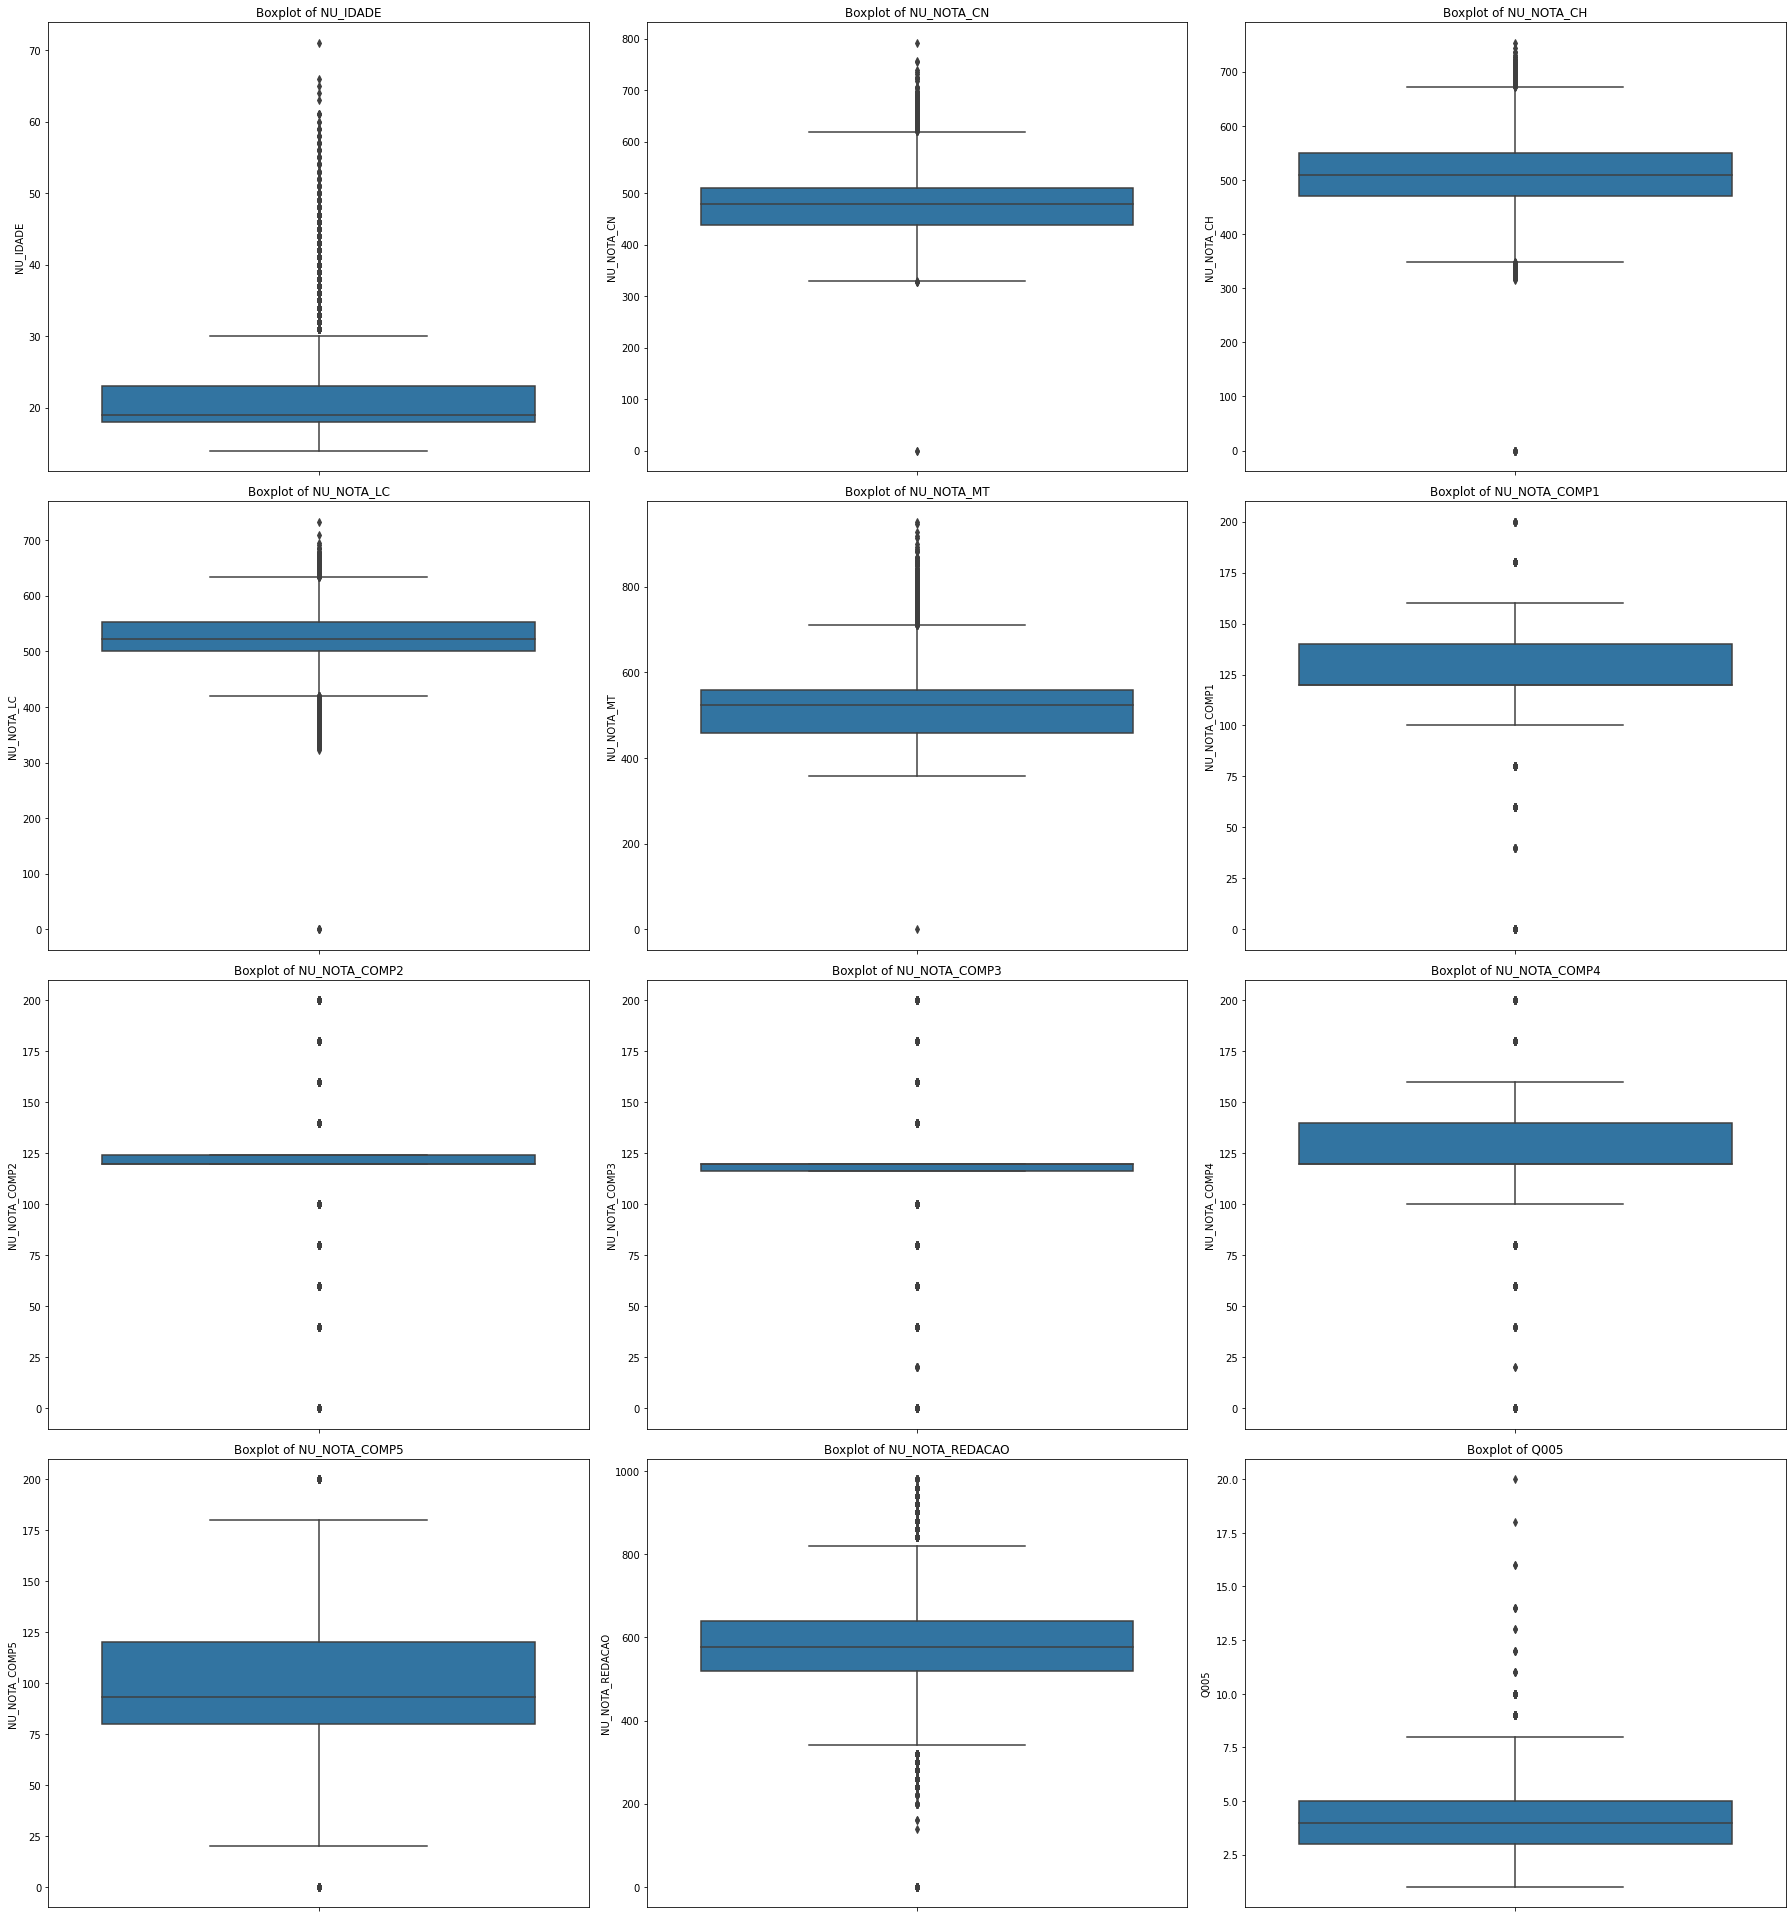

In [40]:
plot_box_plot(enem_quant)

In [41]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    ric = Q3 - Q1
    li = Q1 - (1.5 * ric)
    ls = Q3 + (1.5 * ric)
    return li, ls

In [42]:
enem_quant_without_outlies = enem_quant.copy()

In [43]:
columns_list = enem_quant_without_outlies.columns
for i in columns_list:
    li, ls = detect_outliers(enem_quant_without_outlies[i])
    enem_quant_without_outlies[i] = np.where(enem_quant_without_outlies[i] > ls, ls,enem_quant_without_outlies[i])
    enem_quant_without_outlies[i] = np.where(enem_quant_without_outlies[i] < li, li,enem_quant_without_outlies[i])

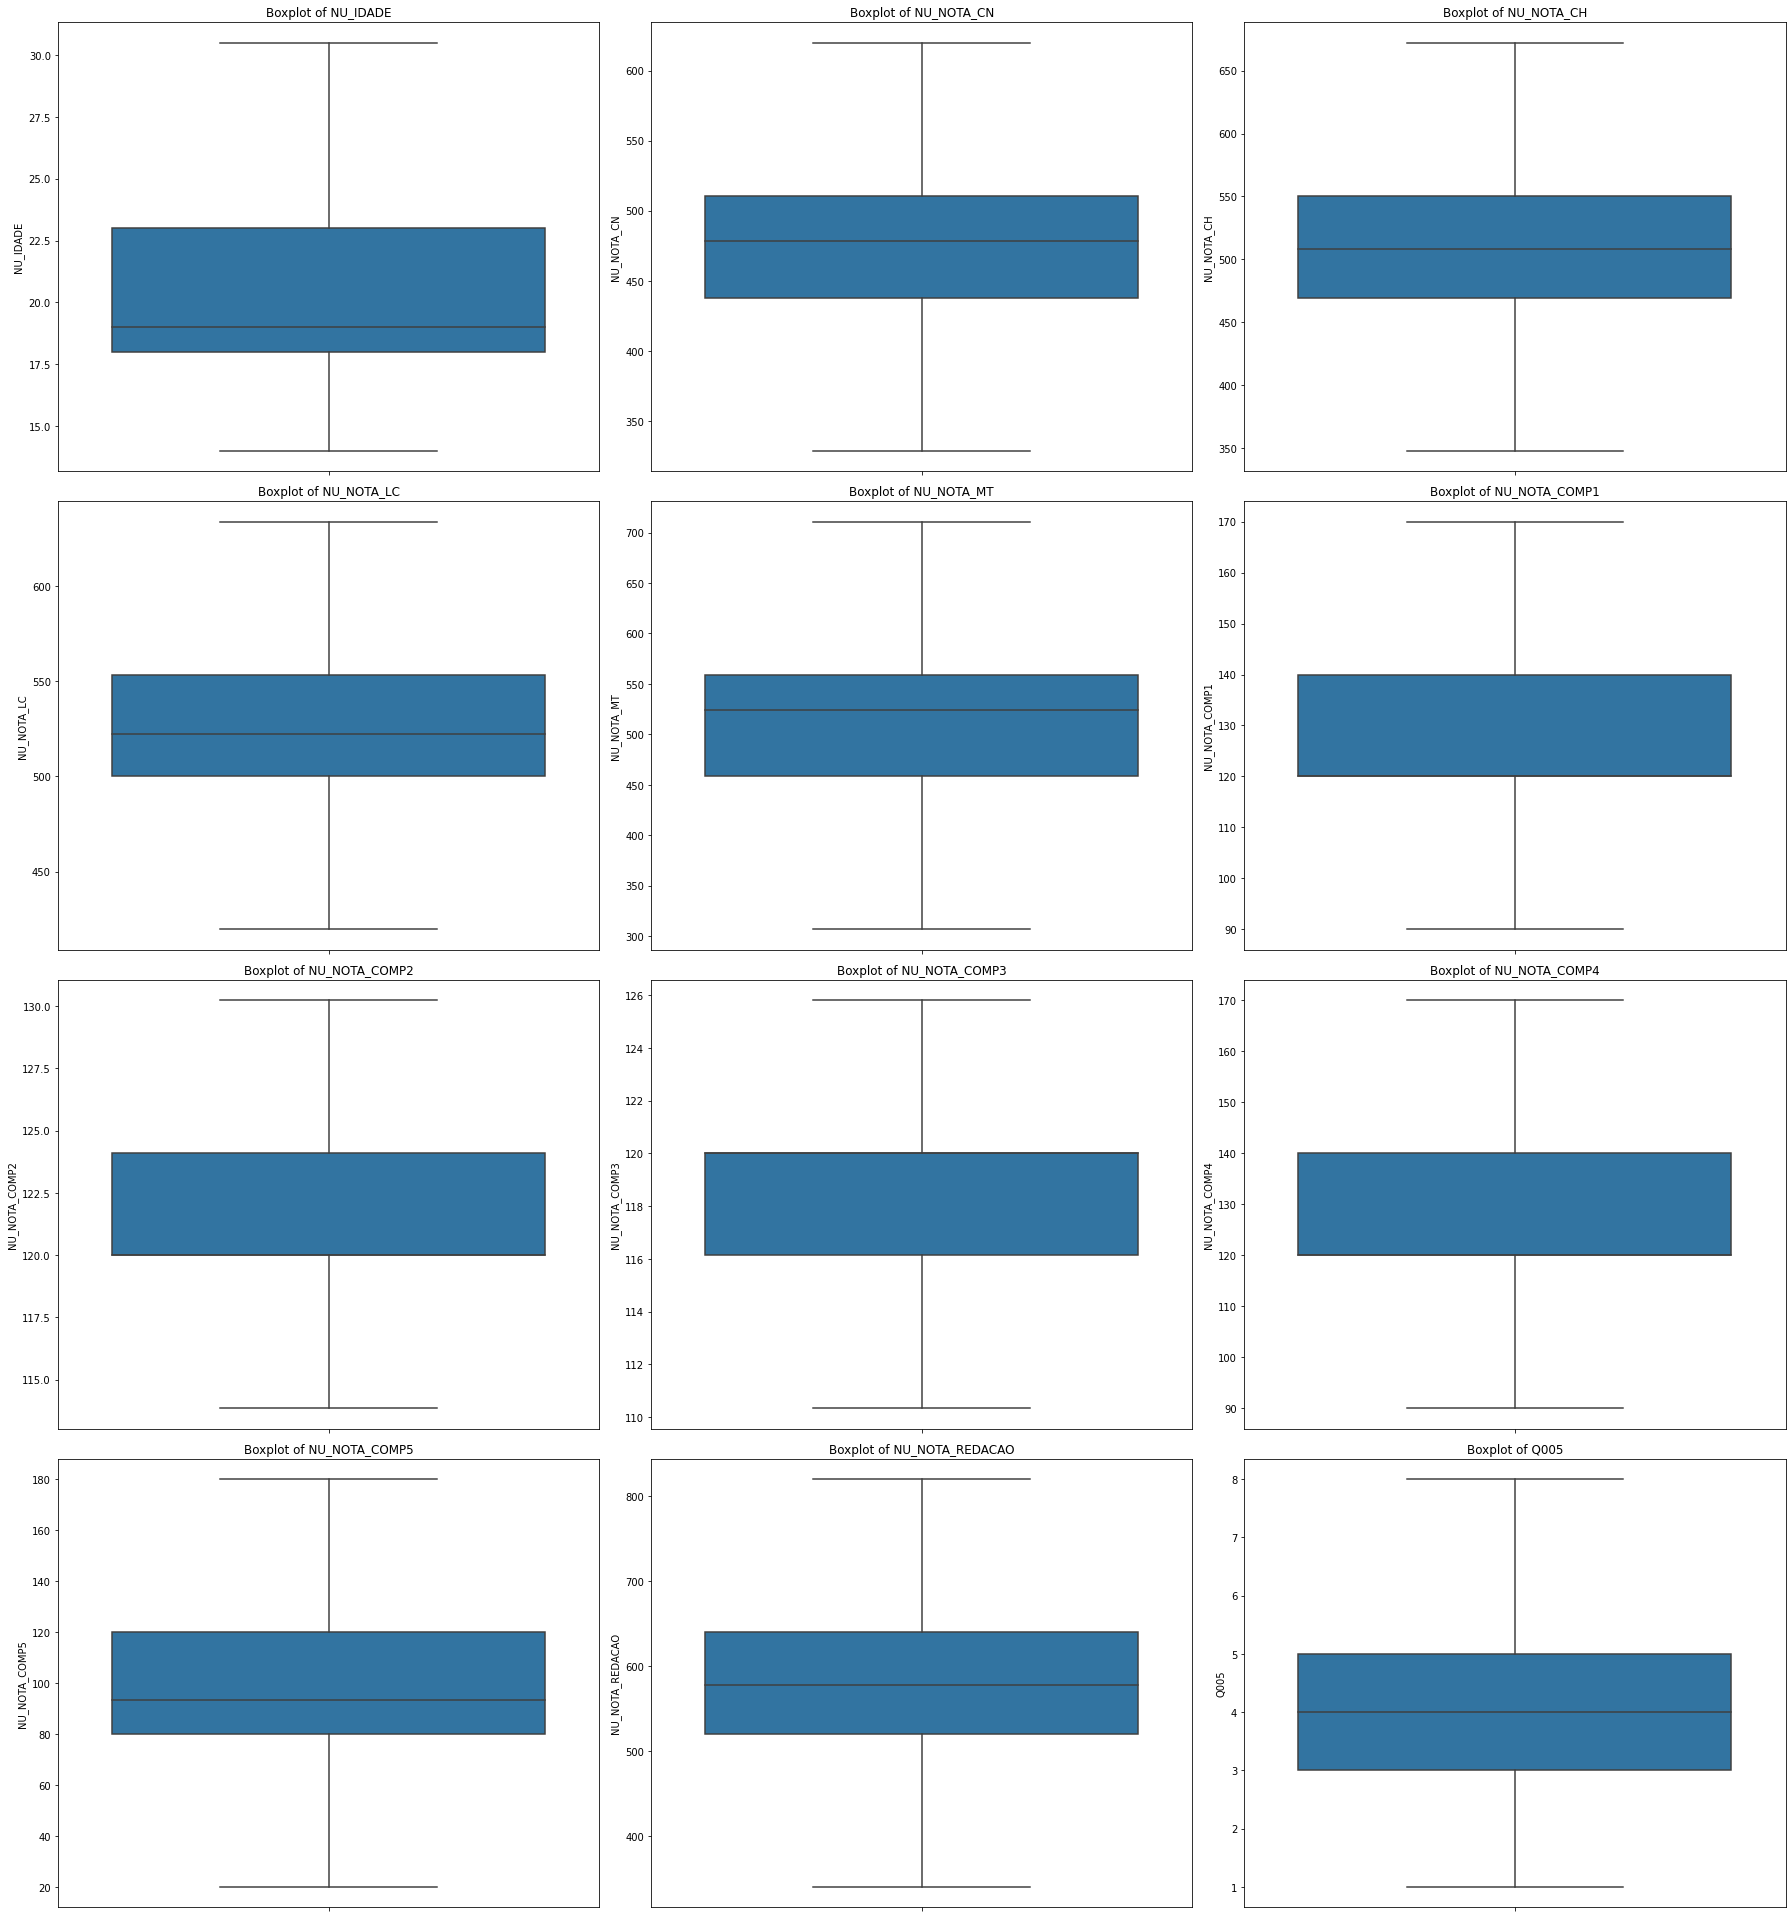

In [44]:
plot_box_plot(enem_quant_without_outlies)

In [45]:
enem_quant_without_outlies.describe()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,20.989800,477.946051,508.984807,523.696432,521.763969,123.927304,122.408654,118.034729,124.762137,95.376051,583.158629,3.832000
std,4.644987,62.951331,69.279205,49.843496,87.083734,19.895696,5.120544,5.499196,21.852416,46.370181,125.249034,1.401061
min,14.000000,328.950000,348.100000,419.750000,306.800000,90.000000,113.860174,110.339800,90.000000,20.000000,340.000000,1.000000
25%,18.000000,438.000000,469.600000,500.000000,458.300000,120.000000,120.000000,116.135920,120.000000,80.000000,520.000000,3.000000
50%,19.000000,478.650951,508.523747,522.027327,524.382679,120.000000,120.000000,120.000000,120.000000,93.368051,577.570629,4.000000
75%,23.000000,510.700000,550.600000,553.500000,559.300000,140.000000,124.093217,120.000000,140.000000,120.000000,640.000000,5.000000
max,30.500000,619.750000,672.100000,633.750000,710.800000,170.000000,130.233043,125.796120,170.000000,180.000000,820.000000,8.000000


In [46]:
enem_without_nan.describe()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q005
count,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000
mean,2019.0,21.916100,2.131600,1.07440,1.029400,1.543600,1.004799,478.650951,508.523747,522.027327,...,93.368051,577.570629,0.0,0.000600,0.0,0.000500,0.001400,0.000600,0.0001,3.85260
std,0.0,7.180684,1.018816,0.44191,0.206252,0.716903,0.051839,65.318739,72.870319,55.784809,...,52.321034,164.738522,0.0,0.024489,0.0,0.022356,0.037392,0.024489,0.0100,1.48926
min,2019.0,14.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,1.00000
25%,2019.0,18.000000,1.000000,1.00000,1.000000,1.000000,1.000000,438.000000,469.600000,500.000000,...,80.000000,520.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,3.00000
50%,2019.0,19.000000,2.000000,1.00000,1.000000,1.000000,1.000000,478.650951,508.523747,522.027327,...,93.368051,577.570629,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,4.00000
75%,2019.0,23.000000,3.000000,1.00000,1.000000,2.000000,1.004799,510.700000,550.600000,553.500000,...,120.000000,640.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,5.00000
max,2019.0,71.000000,5.000000,4.00000,4.000000,4.000000,2.000000,791.900000,753.300000,733.100000,...,200.000000,980.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0000,20.00000


## Gráficos de Análises

In [47]:
import statistics
from scipy import stats

In [48]:
def statistic_analytics(lista, column):
  m = statistics.mean(lista)
  m0 = statistics.mode(lista)
  md = statistics.median(lista)

  # Coeficiente de variação (CV)
  cv = (statistics.stdev(lista) / m)*100

  # Assimetria
  assimetria = stats.skew(lista)

  # Curtose
  curtose = stats.kurtosis(lista)

  print("Coluna = {} CV = {:.2f}% , Assimetria = {:.2f}, Curtose = {:.2f}".format(column, cv, assimetria, curtose))

In [49]:
enem_quant_without_outlies.columns

Index(['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q005'],
      dtype='object')

Coluna = NU_IDADE CV = 22.13% , Assimetria = 0.98, Curtose = -0.33
Coluna = NU_NOTA_CN CV = 13.17% , Assimetria = 0.21, Curtose = -0.18
Coluna = NU_NOTA_CH CV = 13.61% , Assimetria = -0.05, Curtose = -0.04
Coluna = NU_NOTA_LC CV = 9.52% , Assimetria = -0.14, Curtose = -0.06
Coluna = NU_NOTA_MT CV = 16.69% , Assimetria = 0.45, Curtose = -0.24
Coluna = NU_NOTA_COMP1 CV = 16.05% , Assimetria = 0.42, Curtose = -0.18
Coluna = NU_NOTA_COMP2 CV = 4.18% , Assimetria = 0.14, Curtose = -0.75
Coluna = NU_NOTA_COMP3 CV = 4.66% , Assimetria = -0.03, Curtose = -1.15
Coluna = NU_NOTA_COMP4 CV = 17.52% , Assimetria = 0.53, Curtose = -0.16
Coluna = NU_NOTA_COMP5 CV = 48.62% , Assimetria = -0.07, Curtose = -0.63
Coluna = NU_NOTA_REDACAO CV = 21.48% , Assimetria = 0.02, Curtose = -0.15
Coluna = Q005 CV = 36.56% , Assimetria = 0.54, Curtose = 0.55


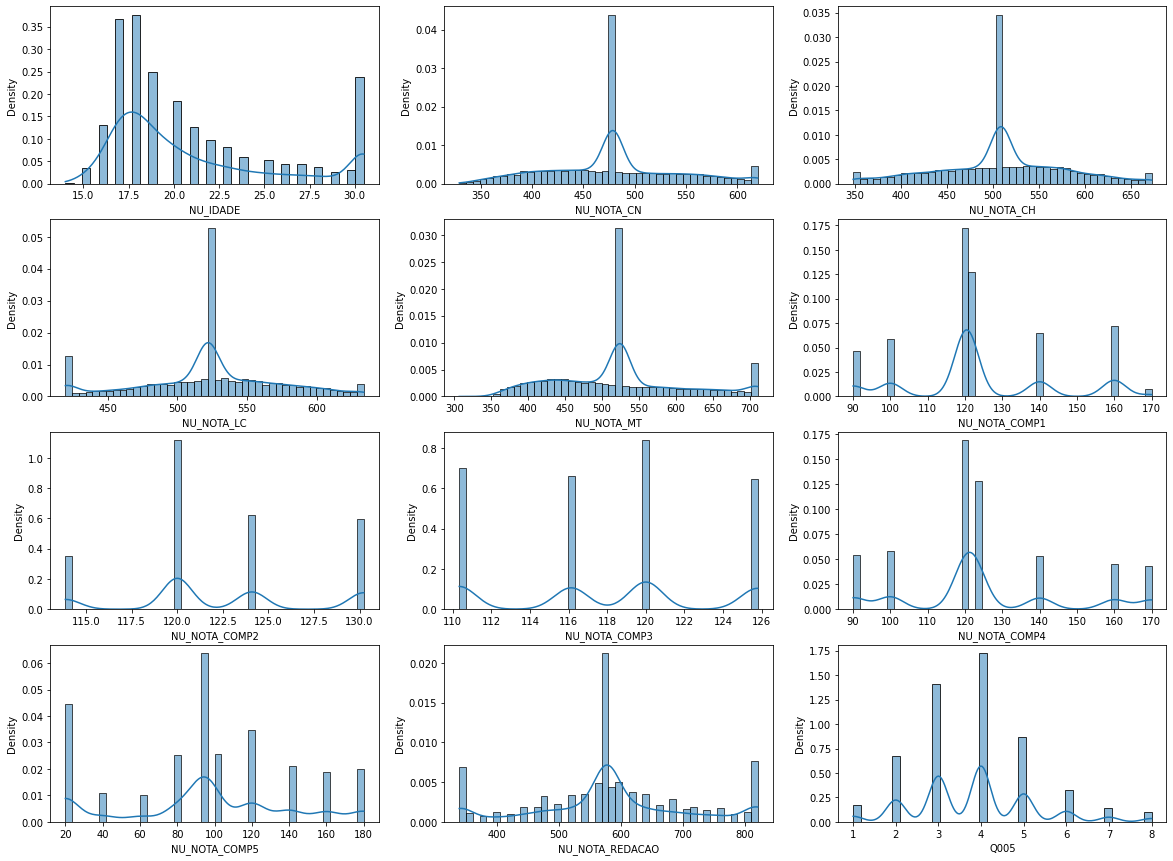

In [50]:
fig, axes = plt.subplots(4, 3, figsize=(20,15))

linha = 0
coluna = 0
for i in enem_quant_without_outlies.columns:
    lista = enem_quant_without_outlies[i]

    statistic_analytics(lista, i)

    sns.histplot(ax=axes[linha,coluna], data=lista, stat="density", kde=True)

    coluna = coluna + 1

    if coluna > 2:
        coluna = 0
        linha = linha + 1


### Resultados

* 'NU_IDADE' - Assimetrica positiva, curva com distribuição normal
* 'NU_NOTA_CN' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_CH' - Assimetrica negativa, curva com distribuição achatada
* 'NU_NOTA_LC' - Assimetrica negativa, curva com distribuição normal
* 'NU_NOTA_MT' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP1' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP2' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP3' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP4' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP5' - Assimetrica negativa, curva com distribuição achatada
* 'NU_NOTA_REDACAO' - Assimetrica, curva com distribuição normal
* 'Q005' - Assimetrica positiva, curva com distribuição alongada

## Correlações

In [51]:
enem_types.shape

(10000, 21)

In [52]:
enem_quant_without_outlies.shape

(10000, 12)

In [53]:
enem_total = pd.concat([enem_types, enem_quant_without_outlies], axis=1)

### Correlação de Pearson

Variáveis Quantitativas

<AxesSubplot:>

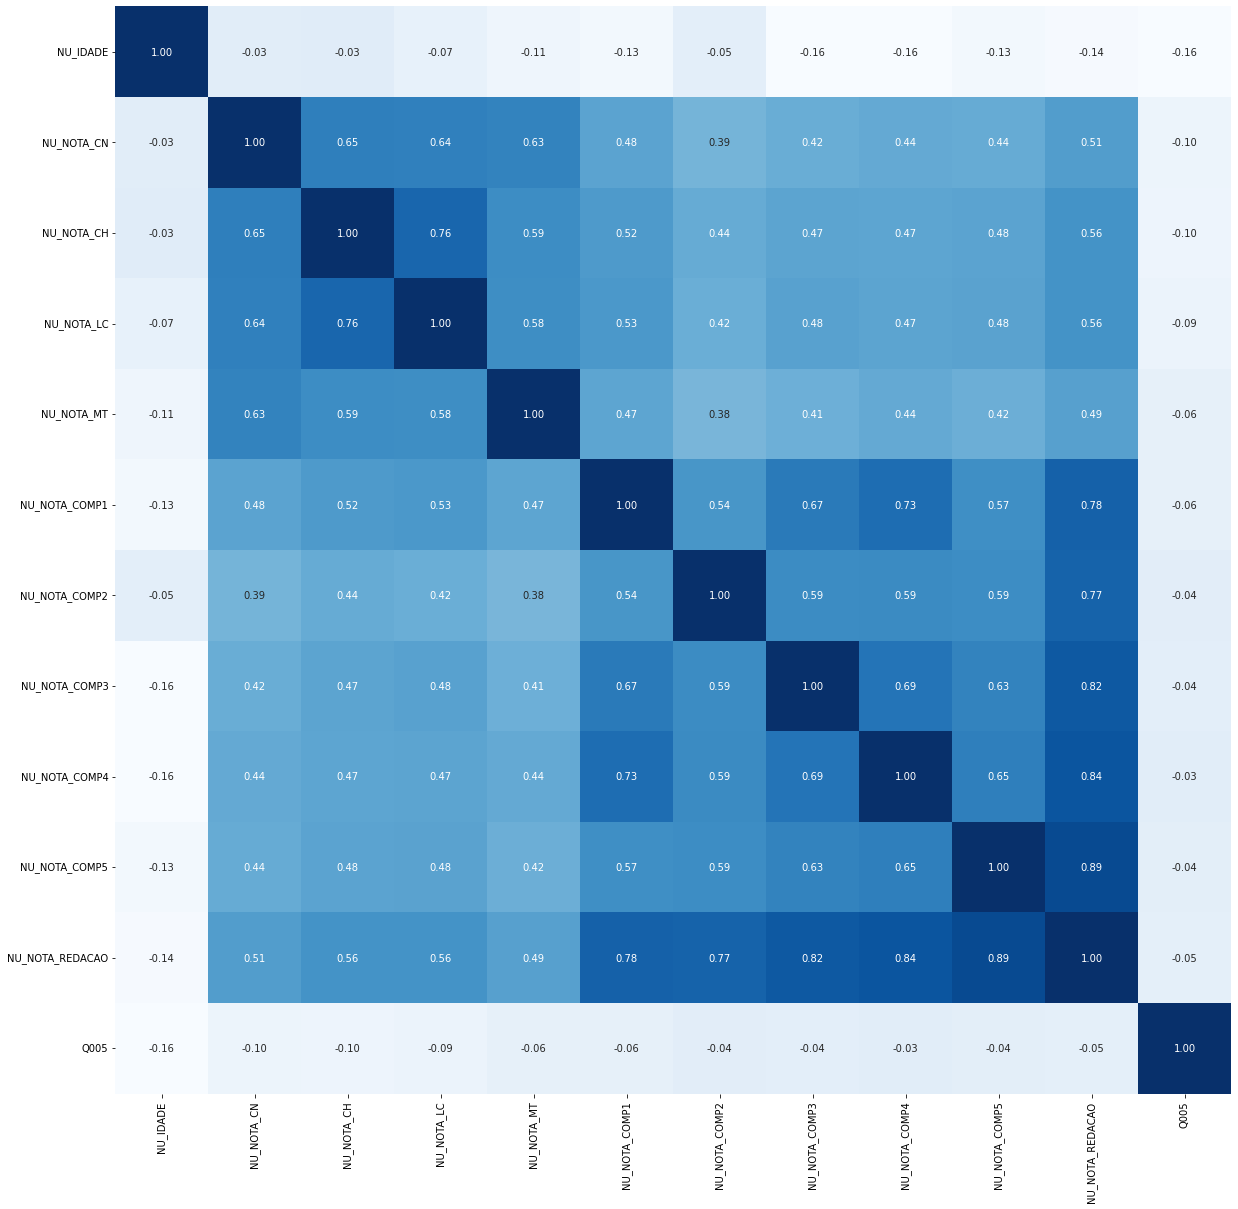

In [54]:
fig = plt.figure(figsize=(20,20))

corr = np.corrcoef(enem_quant_without_outlies.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=enem_quant_without_outlies.columns, yticklabels=enem_quant_without_outlies.columns)


### Correlação de Spearman

Variáveis categoricas

In [55]:
enem_types.columns

Index(['NU_ANO', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESTADO_CIVIL',
       'TP_NACIONALIDADE', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'TP_ST_CONCLUSAO', 'TP_ENSINO', 'IN_BRAILLE', 'IN_AMPLIADA_18',
       'IN_AMPLIADA_24', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO',
       'IN_LIBRAS', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006'],
      dtype='object')

In [56]:
df_teste = pd.DataFrame(columns=enem_types.columns)

df_teste['colunas'] = enem_types.columns

In [57]:
df_teste = df_teste.set_index('colunas')

In [58]:
from scipy.stats import chi2_contingency

df = pd.DataFrame(columns=['column1', 'column2', 'p-value'])

for i in enem_types.columns:
    for j in enem_types.columns:
        lista_i = enem_types[i]
        lista_j = enem_types[j]
        tab = pd.crosstab(lista_i, lista_j)
        chi2, p, dof, exp = chi2_contingency(tab.values)
        df_teste.loc[i,j] = p
        linha_df = {'column1': i, 'column2': j, 'p-value': p}
        df = df.append(linha_df, ignore_index=True)

df

,column1,column2,p-value
0,NU_ANO,NU_ANO,1.0
1,NU_ANO,TP_SEXO,1.0
2,NU_ANO,TP_COR_RACA,1.0
3,NU_ANO,TP_ESTADO_CIVIL,1.0
4,NU_ANO,TP_NACIONALIDADE,1.0
...,...,...,...
436,Q006,Q001,0.0
437,Q006,Q002,0.0
438,Q006,Q003,0.0
439,Q006,Q004,0.0


In [59]:
df_teste

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q006
colunas,,,,,,,,,,,,,,,,,,,,,
NU_ANO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TP_SEXO,1.0,0.0,0.007848,0.027407,0.022047,0.72301,0.016025,0.030317,0.000535,1.0,...,1.0,0.673723,0.328567,0.380597,0.850674,0.000449,0.000939,0.000066,0.000071,0.0
TP_COR_RACA,1.0,0.007848,0.0,0.0,0.000167,0.0,0.0,0.0,0.0,1.0,...,1.0,0.031062,0.000005,0.040303,0.209201,0.0,0.0,0.0,0.0,0.0
TP_ESTADO_CIVIL,1.0,0.027407,0.0,0.0,0.809545,1.0,0.000113,0.0,0.000001,1.0,...,1.0,0.943631,0.0,0.92269,0.997251,0.0,0.0,0.0,0.0,0.001101
TP_NACIONALIDADE,1.0,0.022047,0.000167,0.809545,0.0,1.0,0.527364,0.019676,0.370248,1.0,...,1.0,0.99749,0.852663,0.996419,0.999896,0.253849,0.000132,0.031377,0.00085,0.00036
NO_MUNICIPIO_RESIDENCIA,1.0,0.72301,0.0,1.0,1.0,0.0,0.0,0.389581,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.033203,0.0,0.002773,0.0,1.0
SG_UF_RESIDENCIA,1.0,0.016025,0.0,0.000113,0.527364,0.0,0.0,0.0,0.0,1.0,...,1.0,0.036513,0.204658,0.166947,0.99957,0.0,0.0,0.0,0.0,0.0
TP_ST_CONCLUSAO,1.0,0.030317,0.0,0.0,0.019676,0.389581,0.0,0.0,0.0,1.0,...,1.0,0.840208,0.220215,0.627032,0.483574,0.0,0.0,0.0,0.0,0.0
TP_ENSINO,1.0,0.000535,0.0,0.000001,0.370248,0.0,0.0,0.0,0.0,1.0,...,1.0,0.76173,0.592891,0.866284,0.674991,0.0,0.0,0.0,0.0,0.0


In [60]:
df_teste = df_teste.astype(float)

corr_quali = df_teste.values

print(type(corr_quali))

<class 'numpy.ndarray'>


<AxesSubplot:>

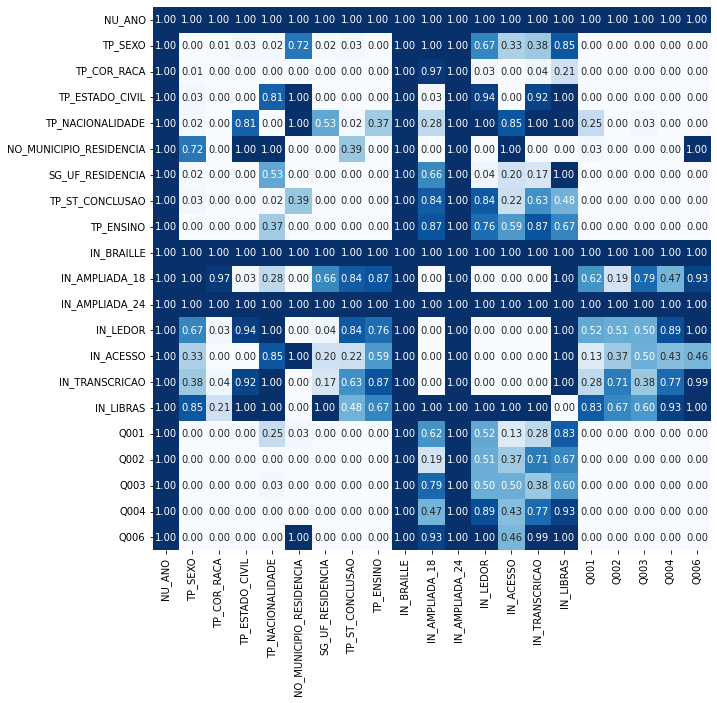

In [61]:
fig = plt.figure(figsize=(10,10))

sns.heatmap(corr_quali, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df_teste.columns, yticklabels=df_teste.columns)

In [62]:
df.loc[df['p-value'] < 0.05]

,column1,column2,p-value
22,TP_SEXO,TP_SEXO,0.000000
23,TP_SEXO,TP_COR_RACA,0.007848
24,TP_SEXO,TP_ESTADO_CIVIL,0.027407
25,TP_SEXO,TP_NACIONALIDADE,0.022047
27,TP_SEXO,SG_UF_RESIDENCIA,0.016025
...,...,...,...
436,Q006,Q001,0.000000
437,Q006,Q002,0.000000
438,Q006,Q003,0.000000
439,Q006,Q004,0.000000


Correlação:

Com base no teste qui² da correlação das variáveis qualitativas, quais são estatisticamente
correlacionadas com p-value > 5% de significância.

1. Com TP_COR_RACA:
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q004
    * Q005
    * Q006

2. Com TP_ESTADO_CIVIL:
    * TP_NACIONALIDADE
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO

3. Com TP_NACIONALIDADE:
    * TP_ESTADO_CIVIL
    * NO_MUNICIPIO_RESIDENCIA
    * Q003
    * Q005

4. Com NO_MUNICIPIO_RESIDENCIA:
    * TP_COR_RACA
    * TP_ESTADO_CIVIL
    * TP_NACIONALIDADE
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * TP_ENSINO
    * IN_ACESSO
    * Q005
    * Q006

5. Com SG_UF_RESIDENCIA:
    * TP_COR_RACA
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q003
    * Q004
    * Q006

6. Com TP_ST_CONCLUSAO:
    * TP_COR_RACA
    * TP_ESTADO_CIVIL
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * Q001
    * Q002
    * Q003
    * Q004
    * Q005
    * Q006

7. Com TP_ENSINO:
    * NO_MUNICIPIO_RESIDENCIA

8. Com IN_ACESSO:
    * NO_MUNICIPIO_RESIDENCIA
    * Q001
    * Q002
    * Q006

9. Com Q001:
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * Q002
    * Q003
    * Q004
    * Q006

10. Com Q002:
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * IN_LEDOR
    * Q001
    * Q003
    * Q004
    * Q006

11. Com Q003:
    * TP_NACIONALIDADE
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q004
    * Q006

12. Com Q004:
    * TP_COR_RACA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q003
    * Q006

13. Com Q005:
    * TP_COR_RACA
    * TP_NACIONALIDADE
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q006

14. Com Q006:
    * TP_COR_RACA
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * Q001
    * Q002
    * Q003
    * Q004
    * Q005


## Variáveis Explicativas e a Variável Dependente

In [63]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,Canindé de São Francisco,SE,2,1.000000,0,...,423.700000,457.200000,461.900000,90.000000,113.860174,110.33980,90.000000,20.000000,340.000000,5.0
190005124618,2019,F,2,1,1,São Bernardo do Campo,SP,2,1.004799,0,...,548.700000,537.900000,427.700000,120.000000,120.000000,120.00000,120.000000,120.000000,600.000000,4.0
190001447215,2019,F,3,2,1,Ibititá,BA,1,1.000000,0,...,508.523747,522.027327,524.382679,121.023304,124.093217,116.13592,122.950137,93.368051,577.570629,3.0
190003825026,2019,M,3,1,1,Tangará da Serra,MT,2,1.000000,0,...,520.100000,430.100000,493.300000,100.000000,120.000000,110.33980,100.000000,20.000000,440.000000,4.0
190001995539,2019,F,1,1,1,Parnarama,MA,2,1.000000,0,...,503.700000,545.200000,585.600000,160.000000,130.233043,125.79612,170.000000,180.000000,820.000000,5.0


### Calculando Variável Dependente

In [64]:
enem_total['NU_NOTA_MEDIA'] = (enem_total.NU_NOTA_CH + enem_total.NU_NOTA_CN + enem_total.NU_NOTA_LC + enem_total.NU_NOTA_MT)/4

### Nota de Corte ENEM:

https://www.guiadacarreira.com.br/educacao/enem/qual-e-a-nota-de-corte-do-enem-2019/

Pegando como base o link acima e a menor e a maior nota de corte:

Administração: 570 a 771
Medicina: 769 a 901

In [65]:
lista_adm = []
lista_med = []

for index, linha in enem_total.iterrows():
    if linha.NU_NOTA_MEDIA > 570:
        lista_adm.append(1)
        if linha.NU_NOTA_MEDIA > 769:
            lista_med.append(1)
        else:
            lista_med.append(0)
    else:
        lista_adm.append(0)
        lista_med.append(0)

In [66]:
enem_total['APPROVED_ADM'] = lista_adm
enem_total['APPROVED_MED'] = lista_med

In [67]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA,APPROVED_ADM,APPROVED_MED
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,Canindé de São Francisco,SE,2,1.000000,0,...,90.000000,113.860174,110.33980,90.000000,20.000000,340.000000,5.0,445.175000,0,0
190005124618,2019,F,2,1,1,São Bernardo do Campo,SP,2,1.004799,0,...,120.000000,120.000000,120.00000,120.000000,120.000000,600.000000,4.0,485.125000,0,0
190001447215,2019,F,3,2,1,Ibititá,BA,1,1.000000,0,...,121.023304,124.093217,116.13592,122.950137,93.368051,577.570629,3.0,508.396176,0,0
190003825026,2019,M,3,1,1,Tangará da Serra,MT,2,1.000000,0,...,100.000000,120.000000,110.33980,100.000000,20.000000,440.000000,4.0,450.700000,0,0
190001995539,2019,F,1,1,1,Parnarama,MA,2,1.000000,0,...,160.000000,130.233043,125.79612,170.000000,180.000000,820.000000,5.0,532.300000,0,0


In [68]:
enem_total.to_csv('enem_tratado.csv')

## Padronizando variáveis

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA,APPROVED_ADM,APPROVED_MED
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,2019,F,3,1,1,Canindé de São Francisco,SE,2,1.000000,0,...,90.000000,113.860174,110.33980,90.000000,20.000000,340.000000,5.0,445.175000,0,0
190005124618,2019,F,2,1,1,São Bernardo do Campo,SP,2,1.004799,0,...,120.000000,120.000000,120.00000,120.000000,120.000000,600.000000,4.0,485.125000,0,0
190001447215,2019,F,3,2,1,Ibititá,BA,1,1.000000,0,...,121.023304,124.093217,116.13592,122.950137,93.368051,577.570629,3.0,508.396176,0,0
190003825026,2019,M,3,1,1,Tangará da Serra,MT,2,1.000000,0,...,100.000000,120.000000,110.33980,100.000000,20.000000,440.000000,4.0,450.700000,0,0
190001995539,2019,F,1,1,1,Parnarama,MA,2,1.000000,0,...,160.000000,130.233043,125.79612,170.000000,180.000000,820.000000,5.0,532.300000,0,0


In [71]:
enem_total_quant = enem_total[['NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5',
'NU_NOTA_REDACAO',
'Q005',
'NU_NOTA_MEDIA']]

In [72]:
enem_total_quant.iloc[:, :] = StandardScaler().fit_transform(enem_total_quant)

enem_total_quant

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,
190003903183,-0.428397,-0.636175,-1.231092,-1.334171,-0.687464,-1.705344,-1.669531,-1.399352,-1.590848,-1.625610,-1.941498,0.833696,-1.095479
190005124618,-0.428397,-0.822042,0.573291,0.284978,-1.080209,-0.197405,-0.470414,0.357392,-0.217934,0.531056,0.134470,0.119915,-0.399954
190001447215,2.047514,0.011198,-0.006655,-0.033489,0.030073,-0.145969,0.328998,-0.345306,-0.082924,-0.043306,-0.044617,-0.593865,0.005194
190003825026,-0.858990,-1.884821,0.160449,-1.877900,-0.326874,-1.202697,-0.470414,-1.399352,-1.133210,-1.625610,-1.143049,0.119915,-0.999289
190001995539,-0.858990,0.266155,-0.076287,0.431443,0.733079,1.813181,1.528115,1.411439,2.070257,1.825056,1.891058,0.833696,0.421357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190005285745,-0.643694,-0.756909,-1.668475,-2.085561,-0.375106,-0.197405,-0.470414,0.357392,-0.217934,0.099723,-0.025220,-1.307646,-1.305051
190001247842,-0.643694,2.252709,1.355672,1.892088,2.170847,1.813181,1.528115,1.411439,2.070257,0.531056,1.891058,0.833696,2.259188
190003996202,-0.858990,-0.632998,0.482351,0.098384,-0.658755,1.813181,-0.470414,1.411439,0.697343,0.962390,0.932919,0.119915,-0.256323


## Dummies

In [73]:
enem_total_quali = enem_total[[
'NU_ANO',
'TP_SEXO',
'TP_COR_RACA',
'TP_ESTADO_CIVIL',
'TP_NACIONALIDADE',
'NO_MUNICIPIO_RESIDENCIA',
'SG_UF_RESIDENCIA',
'TP_ST_CONCLUSAO',
'TP_ENSINO',
'IN_BRAILLE',
'IN_AMPLIADA_18',
'IN_AMPLIADA_24',
'IN_LEDOR',
'IN_ACESSO',
'IN_TRANSCRICAO',
'IN_LIBRAS',
'Q001',
'Q002',
'Q003',
'Q004',
'Q006',
'APPROVED_ADM',
'APPROVED_MED']]

In [74]:
enem_total_quali = pd.get_dummies(enem_total_quali, drop_first=True)

In [75]:
enem_total_quali

,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,APPROVED_ADM,APPROVED_MED,TP_SEXO_M,...,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190005124618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190001447215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190003825026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190001995539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190005285745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190001247842,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
190003996202,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Dataframes Finais

In [76]:
# Qualis Dummizadas
enem_total_quali.to_csv('src/enem_total_quali.csv')

enem_total_quali.head()

,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,APPROVED_ADM,APPROVED_MED,TP_SEXO_M,...,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190005124618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190001447215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190003825026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190001995539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Quantis Padronizadas

enem_total_quant_2 = enem_total[['NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5',
'NU_NOTA_REDACAO',
'Q005',
'NU_NOTA_MEDIA']]

enem_total_quant_2.to_csv('src/enem_total_quant.csv')

enem_total_quant_2.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,
190003903183,19.0,437.900000,423.700000,457.200000,461.900000,90.000000,113.860174,110.33980,90.000000,20.000000,340.000000,5.0,445.175000
190005124618,19.0,426.200000,548.700000,537.900000,427.700000,120.000000,120.000000,120.00000,120.000000,120.000000,600.000000,4.0,485.125000
190001447215,30.5,478.650951,508.523747,522.027327,524.382679,121.023304,124.093217,116.13592,122.950137,93.368051,577.570629,3.0,508.396176
190003825026,17.0,359.300000,520.100000,430.100000,493.300000,100.000000,120.000000,110.33980,100.000000,20.000000,440.000000,4.0,450.700000
190001995539,17.0,494.700000,503.700000,545.200000,585.600000,160.000000,130.233043,125.79612,170.000000,180.000000,820.000000,5.0,532.300000


In [78]:
# Quantis Padronizadas
enem_total_quant.to_csv('src/enem_total_quant_pad.csv')

enem_total_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,
190003903183,-0.428397,-0.636175,-1.231092,-1.334171,-0.687464,-1.705344,-1.669531,-1.399352,-1.590848,-1.625610,-1.941498,0.833696,-1.095479
190005124618,-0.428397,-0.822042,0.573291,0.284978,-1.080209,-0.197405,-0.470414,0.357392,-0.217934,0.531056,0.134470,0.119915,-0.399954
190001447215,2.047514,0.011198,-0.006655,-0.033489,0.030073,-0.145969,0.328998,-0.345306,-0.082924,-0.043306,-0.044617,-0.593865,0.005194
190003825026,-0.858990,-1.884821,0.160449,-1.877900,-0.326874,-1.202697,-0.470414,-1.399352,-1.133210,-1.625610,-1.143049,0.119915,-0.999289
190001995539,-0.858990,0.266155,-0.076287,0.431443,0.733079,1.813181,1.528115,1.411439,2.070257,1.825056,1.891058,0.833696,0.421357


In [79]:
# Total com Dummies e Padronização
enem_total_dum_pad = pd.concat([enem_total_quali, enem_total_quant], axis=1)

enem_total_dum_pad.to_csv('src/enem_total_dum_pad.csv')

enem_total_dum_pad.head()

,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,APPROVED_ADM,APPROVED_MED,TP_SEXO_M,...,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190003903183,0,0,0,0,0,0,0,0,0,0,...,-1.334171,-0.687464,-1.705344,-1.669531,-1.399352,-1.590848,-1.625610,-1.941498,0.833696,-1.095479
190005124618,0,0,0,0,0,0,0,0,0,0,...,0.284978,-1.080209,-0.197405,-0.470414,0.357392,-0.217934,0.531056,0.134470,0.119915,-0.399954
190001447215,0,0,0,0,0,0,0,0,0,0,...,-0.033489,0.030073,-0.145969,0.328998,-0.345306,-0.082924,-0.043306,-0.044617,-0.593865,0.005194
190003825026,0,0,0,0,0,0,0,0,0,1,...,-1.877900,-0.326874,-1.202697,-0.470414,-1.399352,-1.133210,-1.625610,-1.143049,0.119915,-0.999289
190001995539,0,0,0,0,0,0,0,0,0,0,...,0.431443,0.733079,1.813181,1.528115,1.411439,2.070257,1.825056,1.891058,0.833696,0.421357


In [80]:
enem_total.to_csv('src/enem_total.csv')